<a href="https://colab.research.google.com/github/Bhunesh4397/UTS_ML2019_13160890_13326487/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This report contains the analytical results of heart disease UCI dataset which is taken from kaggle platform. This dataset comprises the several attributes which provide the various parameter to the data analyst about person having heart disease or not. The main attributes of this dataset are age, sex, type chest pain, blood pressure testing, cholesterol, blood sugar rate, result of electrocardiographic resting, heart rate, exercise, old peak, slope rate, no of vessels, reversible defect, etc. There are various analytical operations are performed on this dataset which is mainly divided into three tasks in this report. Since given dataset does not contains any null or ambiguous values, it does not require any kind of data cleaning, therefore, that step is removed from the process. The first task of this report is about data exploration in which identification of attribute, evaluation, and exploration of attributes has been performed. The following part of report consists the methodology which describes the method of model building and training. The final part of this report is about evaluation of model in which model testing is performed. This report also contains the efficiency comparison of used model on this dataset. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/ML/heart.csv')
odata = pd.read_csv('/content/gdrive/My Drive/ML/heart.csv')

# Data exploration

This section of this report consists the primary understanding about heart disease UCI dataset. The dataset contains attributes like: age, sex, type of chest pain, blood sugar testing, cholesterol serum in mg/dl, blood sugar rate at the time of fasting, result of electrocardiographic resting, exercise that results angina, depression rate based on exercise, slop of peak exercise, number of major vessels, reversible defects and target which describes the result whether the people have heart disease or not.

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The below oberation describes the statistics of all the attributes suchas count, mean, standard deviation, minimum and maximum value and few more parameters.  

In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The visual representation of number of people have heart disease is shown below, the maximum people who has heart is around 55% while around 55% people does not have any disease related to heart.

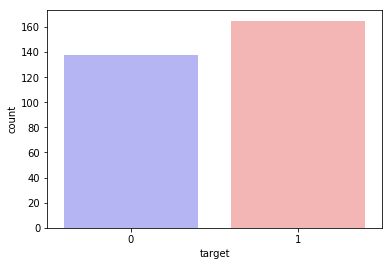

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [19]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

 data statistics have been further explored with respect to the target values like calculating mean for the people who has a heart decease and who does not seprately.

In [20]:
data.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


The graph below represents the frequency of heart disease with respect to age of people. In initial age almost equal people are suffering from heart disease but the ratio of having heart disease is increased with age and almost highest between age of 41 to 54. However the ratio of having heart disease gradually decreased after age of 55 so ultimately maximum number of people are out of danger from heart disease after age of 55.

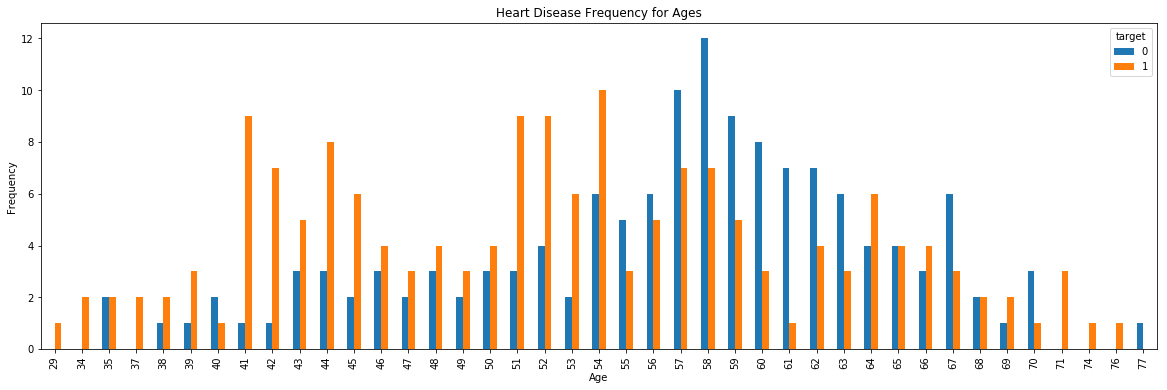

In [21]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

The below bar graph describes the frequency of heart disease for sex having heart disease or not. there are maximum female are suffering from heart disease out of all females, and minimum  male are suffering from heart disease out of all male.

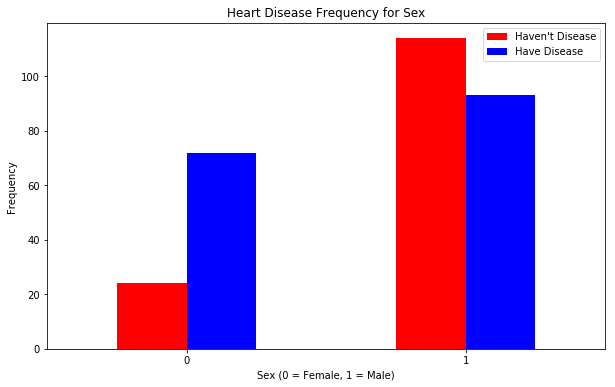

In [22]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,6),color=['#FF0000','#0000FF' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

The below representation describes the maximum heart rate that people have with respect to their age and have heart disease or not.

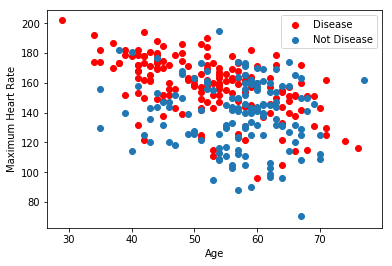

In [23]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

The below bar graph describes the the frequency of heart disease according to fasting blood sugar rate. The maximum number of people have heart disease who does not have fasting sugar rate more then 120.  

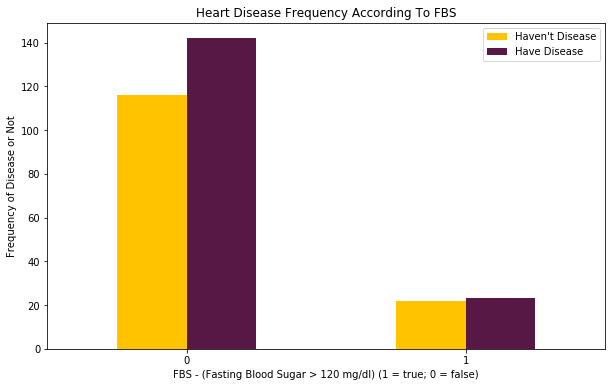

In [24]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(10,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

The below pectorial representation defines the frequency of heart deases according to chest pain type. The maximum people who have heart disease comes in third type of chest pain. However less number of people who having first type of chest pain are not suffering from heart disease.

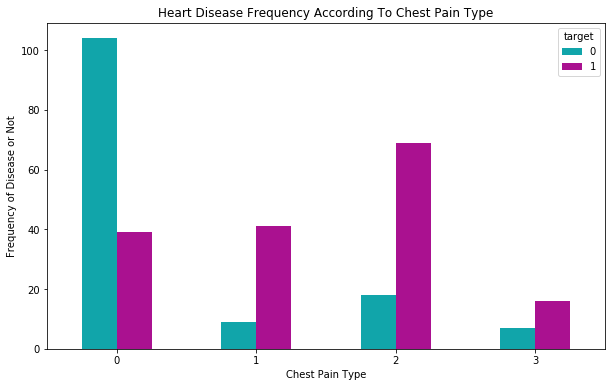

In [25]:
pd.crosstab(odata.cp,data.target).plot(kind="bar",figsize=(10,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Data Pre-processing

Data pre-processing is a procedure of solving issue related to data and extracting accurate outcome from dataset. There are two pre-processing techniques binarization and normalization used for data pre-processing.  

## Binarization

Binarization is a technique that binarized the data in a form of 0 or 1. In this dataset three colums cp, thal, and slop contains the categorical values which is no required for analysis purpose so binarization operation on these columns will creates the dummie columns and cassifies that columns in binary value and then it discards the original columns. 




In [26]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


## Normalization

Normalization is a technique that use to decrease variance in data and also reduce the data redundancy of specified data. The below process describes the normalization operation in which first it drops the target column from original data and then it performs the min-max normalization on rest of the column to get more accurate analytical results.

In [0]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [0]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

Moreover, the data is splited in two parts, one part is for traing the dataset and another one is for testing dataset. Here, around 80% data is divided for traingpurpose and rest are for testing purpose.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Methodology and Evaluation

This section of report, the methodology and evaluation of model is defined which describes the methods for model training and testing and analysis results.

In the methodology, two models have been traind using two different classifiers named random forest and K-nearest neighbour.

After a model is trained, it is used on the testing data to predict the results for that data. Based on the input variables, the trained classifier will be predicting the output of whether the person has heart disease or not. Now the accuracy of this prediction is evaluated by comparing predicted outputs with the original values that are present in the dataset. 


## Random forest classifier

Random forest classifier includes the thousand of decision tree algorithms. This classifier has meta data which helps this classifier to combine various machine learning methods in one predictive model in order to reduce the boosting and bagging. In this classifier, first random forest classifer will be called using n_estimators and random_state parameter and the data will be trained using fit function.



In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

The trained model of random forest is able to predict testing data with 85.25%, and since this accuracy can vary using different parameters, the parameter optimization is done. Max_depth is varied from 1 to 15, and each time the random forest is trained and followed by predicting the test data. Rests of each iteration are stored in an array. Later on, its values are plotted against its parameter values, and maximum accuracy can be obtained. Maximum accuracy obtained using random forest classifier is 86.89% which is obtained using Max_depth value as 5.


In [39]:
rf_pred = rf.predict(x_test)
rf_result = sklearn.metrics.accuracy_score(y_test, rf_pred, normalize=True, sample_weight=None) * 100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf_result))

Random Forest Algorithm Accuracy Score : 85.25%


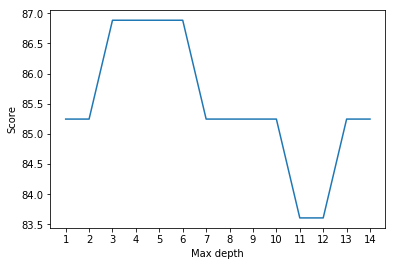

Maximum Random forest Score is 86.89%


In [40]:
rf_scoreList = []
for i in range(1,15):
    rf2 = RandomForestClassifier(n_estimators = 1000, max_depth = i, random_state = 1)
    rf2.fit(x_train, y_train)
    rf2_pred = rf2.predict(x_test)
    rf2_result = sklearn.metrics.accuracy_score(y_test, rf2_pred, normalize=True, sample_weight=None) * 100    
    rf_scoreList.append(rf2_result)
    
plt.plot(range(1,15), rf_scoreList)
plt.xticks(np.arange(1,15,1))
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.show()

rf_acc = max(rf_scoreList)
print("Maximum Random forest Score is {:.2f}%".format(rf_acc))

## K-nearest neighbour

The K-nearest neighbour classifier mainly used for non parametric functions to predict pattern. It uses the point base method for classification in which it takes K for input parameter that is number folds require for prediction.In this model first it takes n_neighbour values as to which is ultimately value of K. Then it performs the classification on data using fit function.

K Nearest Neighbour data model is trained using training data, and the parameter value of n_neighbour is set to 2. This model is giving an accuracy of 81.97%, although it can be increased by optimizing parameters.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_result = sklearn.metrics.accuracy_score(y_test, knn_pred, normalize=True, sample_weight=None) * 100
print("KNN Algorithm Accuracy Score : {:.2f}%".format(knn_result))

KNN Algorithm Accuracy Score : 81.97%


Here, n_neignbours is varied from 1 to 20, and every time the model is trained. Now each trained model will predict with different accuracy, and all the accuracy is stored in an array. Later on, the maximum value of accuracy is obtained from the array. The accuracies are also plotted against the parameter values. Maximum accuracy of 83.61% is achieved for data model trained by KNN is when n_neighbour is taken as 6.

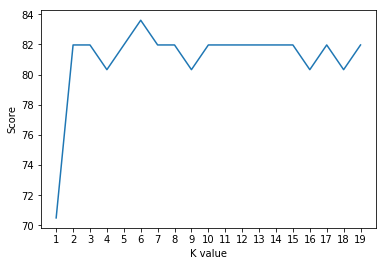

Maximum KNN Score is 83.61%


In [42]:
knn_scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    knn2_pred = knn2.predict(x_test)
    knn2_result = sklearn.metrics.accuracy_score(y_test, knn2_pred, normalize=True, sample_weight=None) * 100
    knn_scoreList.append(knn2_result)
    
plt.plot(range(1,20), knn_scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_acc = max(knn_scoreList)
print("Maximum KNN Score is {:.2f}%".format(knn_acc))

In [43]:
acc = []
acc.append(rf_acc)
acc.append(knn_acc)
acc
classifier = ['Random forest', 'KNN']
classifier

['Random forest', 'KNN']

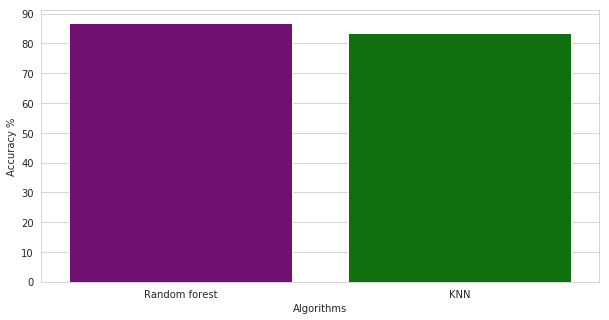

In [44]:

colors = ["purple", "green"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = classifier, y=acc, palette=colors)
plt.show()

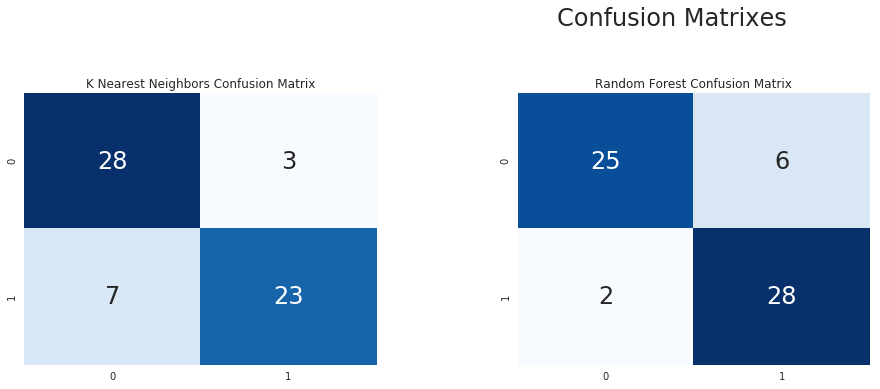

In [45]:
    knn3 = KNeighborsClassifier(n_neighbors = 6)  # n_neighbors means k
    knn3.fit(x_train, y_train)
    knn3_pred = knn3.predict(x_test)
    cm_knn = confusion_matrix(y_test,knn3_pred)
    
    rf3 = RandomForestClassifier(n_estimators = 1000, max_depth = 5, random_state = 1)
    rf3.fit(x_train, y_train)
    rf3_pred = rf3.predict(x_test)
    cm_rf = confusion_matrix(y_test,rf3_pred)
    
    plt.figure(figsize=(24,12))
    plt.suptitle("Confusion Matrixes",fontsize=24)
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
   
    plt.subplot(2,3,1)
    plt.title("K Nearest Neighbors Confusion Matrix")
    sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
     
    plt.subplot(2,3,2)
    plt.title("Random Forest Confusion Matrix")
    sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

    plt.show()


